<a href="https://colab.research.google.com/github/naru289/Assignment-10-Paradigm-Of-ML/blob/main/M2_AST_10_PCA_%26_Gaussian_Mixtures_Model_C%20Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 10: Principal Component Analysis (PCA) & Gaussian Mixtures Model

## Learning Objectives


At the end of the experiment, you will be able to:

* compute co-variance matrix
* calculate the eigen values and eigen vectors
* apply PCA using sklearn package
* Perform PCA using selected no of principal components
* apply support vector classifier on the PCA reduced data
* understand about Gaussian Mixture model


## Dataset

### History

Breast cancer (BC) is one of the most common cancers among women in the world today. Currently, the average risk of a woman in the United States developing breast cancer sometime in her life is about 13%, which means there is a 1 in 8 chance she will develop breast cancer!. An early diagnosis of BC can greatly improve the prognosis and chance of survival for patients. Thus an accurate identification of malignant tumors is of paramount importance.

### Description

The Breast cancer Data Set consists of 569 data instances. This is a binary classification problem which consists of 2 types of cancer classes. The tumor is classified as **benign (1)** or **malignant (0)** based on its geometry and shape. 

The features of the dataset include:

* ID number
* Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)


The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 32 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Class distribution: 357 benign, 212 malignant

Data source to this experiment : https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer. The goal is to classify whether the breast cancer is benign or malignant.


## Domain Information

Many machine learning problems involve a vast number of features for each training instance, making the training extremely slow and harder to find a good solution. This problem is called the **curse of dimensionality**. Therefore, we need dimensionality reduction techniques, that transform data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains most meaningful properties of the original data. Dimensionality reduction speeds up training and is also extremely useful for data visualization. One of the main approaches to reducing dimensionality is data projection. 

#### Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high-dimensional space.

In the figure below a 3D dataset is represented by circles.

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/pca1.png" width=450px/>
</center>

$\hspace{8.6cm} \text{A 3D dataset lying close to a 2D subspace}$
<br><br>

Notice that all training instances lie close to a plane which is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. 

After projecting every training instance perpendicularly onto this subspace, we get the new 2D dataset as shown in the figure below. By that, we reduced the dataset’s dimensionality from 3D to 2D.

<br><br>
<center>
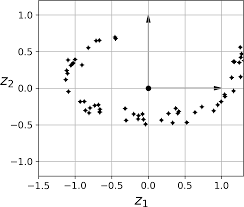
</center>

$\hspace{10cm} \text{The new 2D dataset after projection}$
<br><br>

The most common dimensionality reduction method, that applies projection is:

* PCA (Principal Component Analysis)

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2237180" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "6366871391" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M2_AST_10_PCA_&_Gaussian_Mixtures_Model_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/breast_cancer.csv") 
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Iris.csv") 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [ ]:
breast_cancer = pd.read_csv('breast_cancer.csv')
breast_cancer.head()

In [ ]:
# The dataset has 569 instances and 32 features
print(breast_cancer.shape)

Get a count of the number of Malignant (M) or Benign (B) cells and visualize the count.


In [ ]:
breast_cancer['diagnosis'].value_counts()

In [ ]:
sns.countplot(x=breast_cancer["diagnosis"], label = 'count');

### Storing features and labels from the data

In [ ]:
# Extracting features from cancer data
features = breast_cancer.drop(columns=['diagnosis','id'], axis=1)
features.shape

In [ ]:
# Extracting labels from cancer data
labels = breast_cancer['diagnosis']

Encode the categorical data values

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
encoded_labels[:20]

Let's check the correlation between the features

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(features.corr(), annot=True);

## Principal Component Analysis (PCA)

 
It is defined as the orthogonal transformation of the data into a series of uncorrelated principal components such that the first component explains the most variance in the data with each subsequent component explaining less.

This technique is particularly useful in processing data where multi-colinearity exists between features or when the dimensions of features are high. Using PCA we project the data on a subset of input space.

PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of data on a subset of input space that still contains most of the information in the large set and we project data on the subspace with maximum variance.

###  Mathematical calculation of eigen values and eigen vectors

Step 1:   Standardization

Step 2:   Compute the Covariance matrix

Step 3:  Compute the Eigenvalues and Eigenvectors of the Covariance matrix to identify the principal components

#### 1. Standardization (Scaling the data)

Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. For instance all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function.

So, for each observed value of the variable, subtract the mean and divide by the standard deviation.


In [ ]:
# Define a function for standardization of the data
def standardization(features):

    # Loop through each feature in the dataset
    for feature_name in features:

        # For each feature subtract the mean 
        features[feature_name] -= features[feature_name].mean()

        # Divide by the standard deviation
        features[feature_name] /= features[feature_name].std()
        
    return features

In [ ]:
# Call the 'standardization' function by passing the dataset features
scaled_data = standardization(features)

In [ ]:
# Print the first five rows of the scaled data
scaled_data.head()

#### 2. Compute the covariance matrix

For a given dataset $X = {x_1, . . . , x_N }, X ∈ R^D $. Compute the matrix $\boldsymbol X\boldsymbol X^T$ (a $D$ by $D$ matrix with $D \ll N$), where D is the dimension of the sample in the dataset, and N is the number of samples in the dataset.

Covariance is to measure how the variables of the input dataset are varying from the mean with respect to each other. It gives the variance between each feature in our original dataset. 

The covariance matrix is a d × d symmetric matrix (d is the number of dimensions) where each element represents the covariance between two features.

Assume $X$ is the standardized data, then Co-variance Matrix of $X$ would be, $Σ =\tfrac{X^T.X}{n - 1} $ 

where $X^T$ = Transpose of matrix $X$ and n is number of samples. 

http://www.stat.ucdavis.edu/~xdgli/Xiaodong_Li_Teaching_files/135Note2.pdf

In [ ]:
# Number of samples
n = scaled_data.shape[0]

# Compute the co-variance matrix
cov_mat = np.dot((scaled_data).T, scaled_data) / (n - 1)

#### 3. Compute the Eigenvalues and Eigenvectors 

After the covariance matrix is generated, eigen decomposition is performed on the covariance matrix. Eigenvectors and Eigenvalues are found as a result of the eigen decomposition. 

Eigenvectors of a covariance matrix are actually the directions of the axes where there is a most variance (most information).

Eigenvalues (importance of these different directions) are coefficients attached to each Eigenvector. Each Eigenvector has a corresponding Eigenvalue, and the sum of the Eigenvalues represents all of the variance within the entire dataset.

Compute eigenvalues $\lambda$s and eigenvectors $V$ for $\boldsymbol X\boldsymbol X^T$ matrix. Compute the eigenvectors for the original covariance matrix as $\boldsymbol X^T\boldsymbol V$. Choose the eigenvectors associated with the 'M (cov_mat)' largest eigenvalues to be the basis of the principal subspace.


In [ ]:
# Next find eigenvalues and corresponding eigenvectors for cov_mat
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors are the principal components. The first principal component is the first column and the second principal component is the second column and so on. Each Eigenvector will correspond to an Eigenvalue, each eigenvector can be scaled of its eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its eigenvector.

Arrange the eigen values in the descending order and compute the variance explained for each dimension. It provides the percentage of variance explained at each of the dimensions.

In [ ]:
# Total sum of the eigen values
tot = sum(eig_vals)
# Percentage of variance for each principal component
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

Cumulative sum provides the percentage of variance accounted for by the first n components.

For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second component and so on.

In [ ]:
# Find the cumulative sum for the variance explained by each dimension
cumsum = np.cumsum(var_exp)
print(cumsum)

plot the cumulative sum variance as a function of the number of components/dimensions and check for an elbow in the curve to select the principal components. Cumulative sum is used to display the total sum of data as it grows with each component.

In [ ]:
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('Captured variance') 
plt.show()

Since eigen values capture the variance by each component in the direction of the eigen vector. We can see the percentage of variance contributed by each feature which in turn contributes to the predicting power.

plot to find the maximum variance between each principal component



In [ ]:
fig = plt.figure(figsize=(15, 8))
# Plot the explained variance around each dimesnion
plt.bar(range(1, len(var_exp)+1), var_exp)
plt.xticks(np.arange(0, 35, 5))
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

The first seven components together covering most of the information about (91%). So, the remaining components can be dropped without losing much information.

We can then compute the projection and reconstruction of the data onto the space spanned by the top $n$ eigenvectors (no. of principal components).

We compute the projection matrix onto the space spanned by `B` where, B: ndarray of dimension (D, M), the basis for the subspace where D is the dimension of the data, and N is the number of datapoints which returns the projection matrix.

we assume there exists a low-dimensional compressed representation $z_n = B^T X ∈ R^M$ of $X$, where we define the projection matrix $B = [b_1,...b_M] ∈ R^{D×M}$. We assume that the columns of B are orthonormal so that $b_i^T b_j = 0$ if and only if $i \neq j$ and $b_i^T b_j = 1$. We seek an M-dimensional subspace $U ⊆ R^D$, $dim(U) = M < D$ onto which we project the data. 


In [ ]:
# Select the top 7 eigen vectors (principal components)
B = eig_vecs[:, :7]

# Dimensionality reduction of the original data to 7 principal compoenents
X = scaled_data.dot(B)

print(X.shape)

In [ ]:
# Reconstruct the data from the lower dimensional representation
X_reconstruct = X.dot(B.T)
print(X_reconstruct.shape)

### Applying PCA using sklearn package

Scikit-Learn’s `PCA` class uses singular value decomposition (SVD) decomposition to implement PCA.

To know more about Scikit-Learn’s `PCA` class, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).




#### Apply PCA on the scaled data


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_data);

#### Principal Components using the Explained Variance Ratio

pca.explained_variance_ratio_ parameter returns a vector of the variance explained for each dimension.

PCA function provides explained_variance_ratio_ which gives the percentage of explained variance at each of the selected components.

In [ ]:
variance = pca.explained_variance_ratio_ * 100
print(sorted(variance, reverse=True))

44.27% of variance on the data is explained by the first principal component, the second principal component explains 18.97% of data

Cumulative variance in PCA gives the percentage of variance accounted for by the first n components.

For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second component and so on.

In [ ]:
cumsum_explained_variance = np.cumsum(variance)
print(cumsum_explained_variance)

If we use the first feature, it will explain 44.27% of the data; If we consider two features we can capture 63.2% of the data. If we use all features we can describe the entire dataset.

#### Determining how many number of components

Instead of arbitrarily choosing the number of dimensions to reduce down to, we can either

* select 2 or 3 dimensions for data visualization

* choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., `PCA(n_components=0.92)` for 92% variance)

* Visualize the eigenvalues in order from highest to lowest, connecting them with a line. Upon visual inspection, keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the “elbow”

* plot the cumulative explained variance as a function of the number of components/dimensions and check for an elbow in the curve

In [ ]:
# Visualize Explained variance as a function of the number of dimensions
plt.plot(cumsum_explained_variance)
plt.xlabel('number of components')
plt.ylabel('Captured variance') 
plt.show()

#### Plotting the variance percentage at each principal component

Cumulative sum is used to display the total sum of data as it grows with each component (or any other series or progression). It is view of the total contribution so far of a given measure against principal components.


In [ ]:
# Finding the variance between the each principal component
fig = plt.figure(figsize=(15, 8))
tot = sum(variance)
var_exp = [(i / tot)*100 for i in sorted(variance, reverse=True)]
plt.bar(range(1,len(var_exp)+1), var_exp)
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

In [ ]:
# Print the 'var_exp' and select the no of principal components where the highest variance is preserved
print(var_exp)

From the above plot, the first 7 principal components together contain 91% of the information. So, reducing the dimensionality to about 7 number of principal components  wouldn’t lose too much explained variance. So, remaining components can safely be dropped without losing much information.

#### PCA for Compression

After dimensionality reduction, the training set takes up much less space. This size reduction can speed up a classification algorithm tremendously.

we will find low-dimensional representations that retain as much information as possible and minimize the compression loss where, we will be looking at minimizing the squared reconstruction error $||X - \bar{X}||^ 2$ between the original data and its projection.

We can also decompress the reduced dataset back to original dimensions by applying the inverse transformation of the PCA projection.

In the following code:

1. First we iterate through the different number of principal components
2. Perform PCA on a range of selected number of components by using `PCA(n_components)`. Here, `n_components` represents how many optimum features need to be used to represent the data without having data loss.
3. By applying `pca.fit_transform` method compress the dimensionality of the original dataset
4. Then by using `pca.inverse_transform` method decompresses it back to original 30 dimensions
5. Compute the reconstruction error (MSE), between the original dataset and the decompressed data




In [ ]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()    

In [ ]:
loss = []

# Iterate over different numbers of principal components, and compute the MSE
for num_component in range(1, 31):
  
    # Create an instance for PCA 
    pca = PCA(n_components=num_component)

    # Perform PCA on the scaled data
    reduced_data = pca.fit_transform(scaled_data)

    # Reconstruct the original data
    reconst_data = pca.inverse_transform(reduced_data)

    # Compute the reconstruction error between the original and the projected data
    error = mse(reconst_data, scaled_data)
    print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))
    
loss = np.asarray(loss)

Here the data compression is not lossless. The data after decompression won't be exactly the same as the original. It will be an approximation.

How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Support Vector classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset

### Plotting MSE vs no of principal components

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(loss[:,0], loss[:,1]);
plt.xticks(np.arange(1, 31, 1))
plt.xlabel('Number of components')
plt.ylabel('Mean Square Error')
plt.title('MSE vs number of principal components')
plt.show()

From the above plot, we can observe as the number of principal components increases, which is the number of eigenvectors used to build the feature space, we can see the mean square error is decreasing. We also observe that when the number of components approaches the number of features that we use to build the feature space, the error is close to 0. The greater number of of principal components we use, the smaller will our reconstruction error be.

#### Apply PCA after selecting the '7' principal components

Here `n_components` represents how many optimum features need to be used to represent the 30 dimensional data without having data loss.

In [ ]:
# Perform PCA after selecting the optimum no. of principal components
pca = PCA(n_components=7)

# Fit the original data
pca_transformed = pca.fit_transform(scaled_data)

# Reconstruct back the original data
reconst_data = pca.inverse_transform(pca_transformed)

In [ ]:
print(reconst_data.shape)

You can compare the reduced data using PCA from scikit learn with the mathematical approach for projecting the data to low-dimensional subspace and reconstructing the data back to original data of 30 features 

#### Visualization of first 2 principal components in 2D

In [ ]:
# 2 dimensional data
# Assigning labels to plot with color
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=encoded_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Split the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pca_transformed, encoded_labels, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

### Train the Support Vector Classifier with reduced data

In [ ]:
clf = SVC(kernel='linear')

# Train the model
clf.fit(X_train,Y_train)

# Get the prediction on the test set
predicted = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, predicted)

print("Accuracy of test data is",accuracy)

### Model Evaluation

#### Classification Report

In [ ]:
# Classification Report
print(classification_report(Y_test, predicted))

#### Confusion Matrix

In [ ]:
mat = confusion_matrix(Y_test, predicted)
# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');

### Problem Statement: Gaussian Mixture Model (GMM) Clustering

### Dataset Description


The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- Sepal length in cm
- Sepal width in cm
- Petal length in cm
- Petal width in cm
- Species: Setosa, Versicolor, and Virginica




### Problem Statement

This data set consists of the physical parameters of three species of flower — **Versicolor**, **Setosa** and **Virginica**. The numeric parameters which the dataset contains are **Sepal width**, **Sepal length**, **Petal width** and **Petal length**. It is a multivariate data set which is used for multiple measurements in taxonomic (the scientific process of arranging things into groups) problems. This data can be used to quantify the morphologic variation(additive genetic variation) of Iris flowers of three related species based on the provided features. 

Therefore, based on these features we will try to cluster the flower species using clustering algorithm and compare their accuracies.

## Information

* Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.

* Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. 

* Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.  



### Import required packages

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

###Loading the Data

In [ ]:
data = pd.read_csv('/content/Iris.csv')

Let us have a look at the shape of the dataset.

In [ ]:
data.shape

There are five features with 150 rows of information related those features.

Let us drop 'Id' column from the data as it adds no significance to the information.

In [ ]:
data = data.drop('Id', axis=1)
data.sample(5)

Further, let us split the dataset into fetures and label that would help us to apply the algorithm on features.

In [ ]:
# Split the data into features (X) and labels (y)
X = data.iloc[:,0:4] # First four columns as features
y = data.iloc[:,-1] # Taking species as label

In [ ]:
# Let us have a glance at first few values of the splitted dataset
print(X.sample(5))
print(y.sample(5))

### Data Visualization

Let us count how many values are there in the individual species.

In [ ]:
data["Species"].value_counts()

All the three species have equal weightage in the dataset.

Now, let us visualize species for each sample for **sepals**.

In [ ]:
sns.FacetGrid(data, hue="Species", height=4, aspect=1) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

Now, let us visualize species for each sample for **petals**.

In [ ]:
sns.FacetGrid(data, hue="Species", height=4, aspect=1) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

**Interpretation**: Note that the species are nearly linearly separable with petal size, but sepal sizes are more mixed. Therefore, sepal sizes can be a major concern while differentiating between versicolor and virginica.

Also, we can observe that the petal length and width for virginica is highest among all three species.

Let us visualize each pair of features present in the data.


In [ ]:
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

Here, the above plot shows how similar versicolor and virginica are, at least with the given four features (Sepal Length, Sepal Width, Petal Length, and Petal Width).


Now, let us plot a pairplot and understand about the data distribution whether it forms multi gaussian distribution or not.

In [ ]:
sns.pairplot(data, hue="Species", size=2, diag_kind="kde");

Here, in the above plot, we can see see the gaussian distribution for all three species based sepal length, sepal width, petal length, and petal width.

**Note :** We can apply Gaussian Mixture on the data which follows multivariate(multiple random variable or more than one feature) gaussian distribution.

### Feature Scaling

In this dataset, when you observe it carefully you will get to see that the data is unbalanced i.e. **sepal length ~ 4x petal width**. So, this will effect the prediction as higher values can be given a higher significance. Therefore, we have to scale the data within a common range using feature scaling.

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

Let us look at data/information after scaling has been performed.

In [ ]:
X_scaled.sample(5)

### Applying Principal Component Analysis (PCA)


If you have a lot of features it can be helpful to do some feature reduction to avoid the curse of dimensionality (i.e. needing exponentially more data to do accurate predictions as the number of features grows).

You can do this using Principal Component Analysis (PCA), which remaps the data to a new (smaller) coordinate system which tries to account for the most information possible.

You can *also* use PCA to visualize the data by reducing the features to 2 dimensions and making a scatterplot. 

In [ ]:
# mash the data down into 2 dimensions
ndimensions = 2

pca = PCA(n_components=ndimensions)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

In [ ]:
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

In [ ]:
plt.scatter(X_pca['PC1'],X_pca['PC2']);

So, now we have new 2d coordinates for each data point.



### Gaussian Mixture Model (GMM) Clustering

Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.

k-means does not account for variance(width of the bell shape curve). In two dimensions, variance/ covariance determines the shape of the distribution.

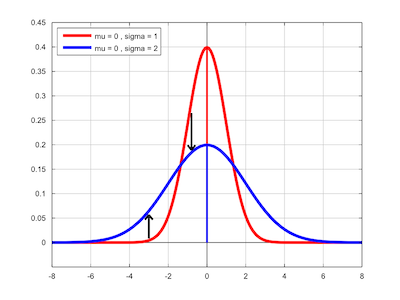

k-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

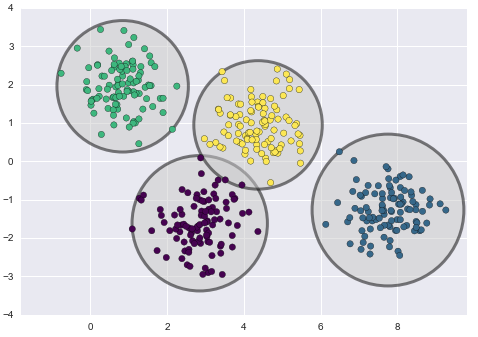

This works fine for when data is circular. However, when data takes on different shape, we end up with something like this.

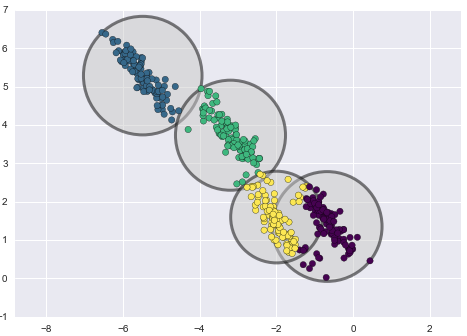

In contrast, Gaussian mixture models can handle even very oblong clusters.

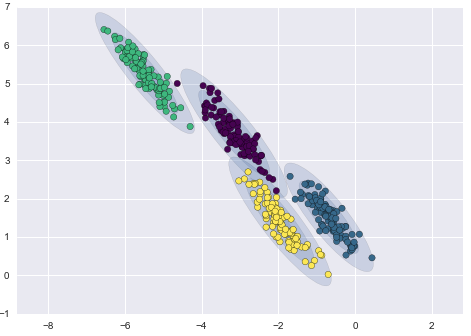


* K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster GMM provide us the probabilities of the data point belonging to each of the possible clusters.
In Sklearn,  gmm.predict(X)  the model assigns every data point to one of the clusters and  gmm.predict_proba(X)  function return the probabilities that a data point belongs to each of the K clusters.

* Sklearn's GaussianMixture also comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.

#### Gaussian Mixture Models At A Glance
As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

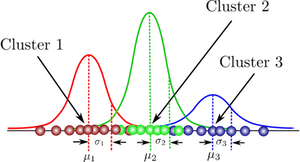

Every distribution is multiplied by a weight  π ( π1+π2+π3=1 ) to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class.


####Expectation Maximization
**Expectation**

The first step, known as the expectation step or  E  step, consists of calculating the expectation of the component assignments  $C_{k}$  for each data point  $x_{i}∈X$  given the model parameters  $π_{k}$ ,  $μ_{k}$ , and  $σ_{k}$.

**Maximization**

The second step is known as the maximization step or  M  step, which consists of maximizing the expectations calculated in the E step with respect to the model parameters. This step consists of updating the values  $π_{k}$ ,  $μ_{k}$  and  $σ_{k}$.

The entire iterative process repeats until the algorithm converges, giving a maximum likelihood estimate. Intuitively, the algorithm works because knowing the component assignment  $C_{k}$  for each  $x_{i}$  makes solving for  $π_{k}$ ,  $μ_{k}$ , and  $σ_{k}$  easy, while knowing  $π_{k}$ ,  $μ_{k}$ ,  $σ_{k}$  makes inferring  $p(C_{k{|x_{i}}})$  easy. The expectation step corresponds to the latter case while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, maximum likelihood estimates of the non-fixed values can be calculated in an efficient manner.


#### Algorithm
* Initialize the mean  $μ_{k}$ , the covariance matrix  $Σk$  and the mixing coefficients  $π_{k}$  by some random values(or other values).

* Compute the  $C_{k}$  values for all k.

* Again estimate all the parameters using the current $C_{k}$ values.

* Compute log-likelihood function.

* Put some convergence criterion

* If the log-likelihood value converges to some value (or if all the parameters converge to some values) then stop, else return to Step 2.

This algorithm only guarantee that we land to a local optimal point, but it do not guarantee that this local optima is also the global one. And so, if the algorithm starts from different initialization points, in general it lands into different configurations.

Finally, all this can be accomplished using `GaussianMixture` package from `sklearn` library.

#### Deciding number of clusters based on Silhouette Score

In [ ]:
X = X_pca
print("Clusters\t\tSilhoutte Score\n")
for n_components in range(2,6):
   gmm = GaussianMixture(n_components=n_components).fit(X)
   sil_coeff = silhouette_score(X, gmm.predict(X))
   print(f"n_components = {n_components}\t-->{sil_coeff}")

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.

* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

* -1: Means clusters are assigned in the wrong way.


We can observe that the silhouette score is highest when number of components is 2. Therefore, we will implement GMM using 2 components as well as 3 components and check the goodness using Adjusted Rand Index.. 

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(X_scaled)

# Predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

Let’s look at the parameters that the algorithm estimated:

In [ ]:
# Estimated weights, means, covariance matrices of clusters
print("Weights: ", gmm.weights_)
print("Means: ", gmm.means_)
print("Covariance matrices: \n", gmm.covariances_)

Creating a function for visualization of GMM Cluster.

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.legend([labels])
    if label:
        ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Now, let us have a look at how the clusters have been formed for the Gaussian Mixtures Model.

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42,)
plot_gmm(gmm, X_pca)

Visualizing the plot with 3 components.

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42,)
plot_gmm(gmm, X_pca)

The GMM did much better at finding the actual species clusters! How did it do that? 

K-means is biased towards spherically distributed clusters.But, GMM tries to fit normally distributed clusters, which is probably the case with this data, so it fits it better. 

**Note**: *Gaussian Mixture Model (GMM) Clustering handles ellipsoidal distributions, and makes 'soft' assignments to clusters, but is much slower than k-means for large datasets.*


### Please answer the questions below to complete the experiment:




#### Consider the following statement about Principal Component Analysis (PCA) and answer Q.1.

A. PCA is a supervised dimensionality reduction technique

B. All Principal components are orthogonal to each other

C. PCA computes the direction in which the data has the largest variance

D. PCA is non-linear dimensionality reduction technique

In [ ]:
#@title Q.1.Which of the above options is/are true regarding Principal Component Analysis (PCA)? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "Both B and C" #@param ["","Only A", "Only B", "Both B and C", "Both C and D", "All of the above"]

#### Consider the following problem and answer Q.2.

##### For the given 2D data (X, Y) = (1, 6), (2, 7), (3, 8), (4, 9), (5, 10), or represented as follows: 
\\
\begin{bmatrix}
1 & 6   \\
2 & 7   \\
3 & 8   \\
4 & 9   \\
5 & 10   \\
\end{bmatrix}

\\
Compute the following :-

1. The covariance matrix

2. The normalized eigenvalues and eigenvectors of the covariance matrix

The first Principal Component (eigenvector with highest variance) are given as follows:

A. \begin{bmatrix}
-\frac{1}{\sqrt2}  \\
-\frac{1}{\sqrt2} \\
\end{bmatrix}

B. \begin{bmatrix}
-\frac{1}{2}  \\
-\frac{1}{2} \\
\end{bmatrix}

C. \begin{bmatrix}
\phantom{-}\frac{1}{2}  \\
-\frac{1}{2} \\
\end{bmatrix}

D. \begin{bmatrix}
\frac{1}{\sqrt2}  \\
\frac{1}{\sqrt2} \\
\end{bmatrix}


In [ ]:
#@title Q.2. Which is the first Principal Component (eigenvector along which the variance of the data is the highest) for the given dataset from the choices above computed from the Covariance Matrix? Please manually solve the problem yourself and compare it with experimental results. { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "B" #@param ["","A", "B", "C", "D", "None of the above"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")